In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import category_encoders as ce
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.shape

(245725, 11)

In [4]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [6]:
train.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


In [7]:
dups = train.duplicated()
dups.sum()

0

In [8]:
num = ['Age', 'Vintage', 'Avg_Account_Balance']
cat = ['Region_Code','Gender','Occupation','Channel_Code','Credit_Product','Is_Active','Is_Lead']

In [9]:
#removing outliers

def outliers(col):
    Q1,Q3 = np.percentile(col, [25,75])
    IQR = Q3-Q1
    LR = Q1-1.5*IQR
    UR = Q3+1.5*IQR
    return LR, UR

In [10]:
train_backup = train.copy()

In [11]:
for i in train[num]:
    lr, ur = outliers(train[i])
    train[i] = np.where(train[i]>ur,ur,train[i])
    train[i] = np.where(train[i]<lr,lr,train[i])

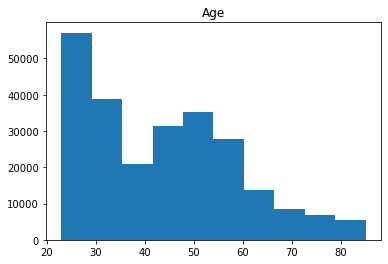

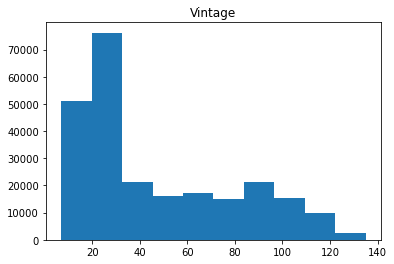

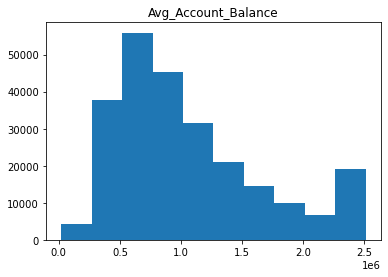

In [12]:
for i in num:
    plt.hist(train[i])
    plt.title(i)
    plt.show()

In [13]:
import seaborn as sns

                          Age   Vintage  Avg_Account_Balance
Age                  1.000000  0.631242             0.173492
Vintage              0.631242  1.000000             0.199300
Avg_Account_Balance  0.173492  0.199300             1.000000


<AxesSubplot:>

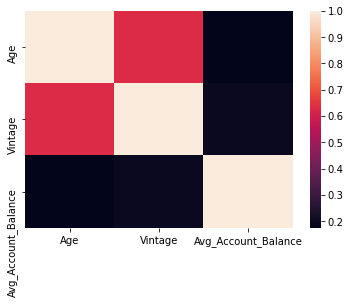

In [14]:
print(train[num].corr())
sns.heatmap(train[num].corr())

In [15]:
pd.pivot_table(train, index='Is_Lead', values = num)

,Age,Avg_Account_Balance,Vintage
Is_Lead,,,
0,41.947662,1.037422e+06,41.913923
1,49.993944,1.136802e+06,63.183074


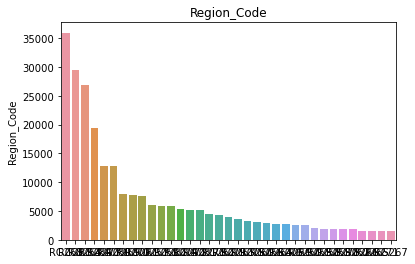

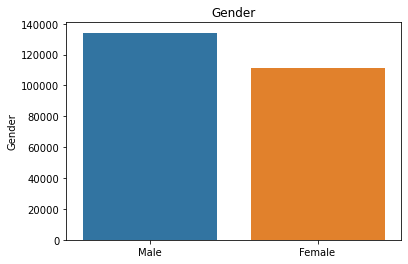

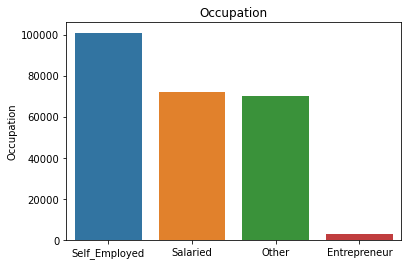

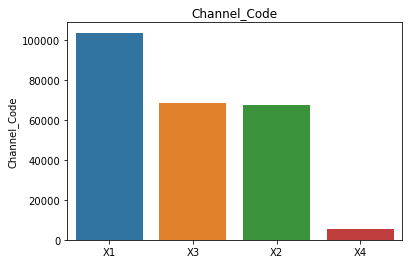

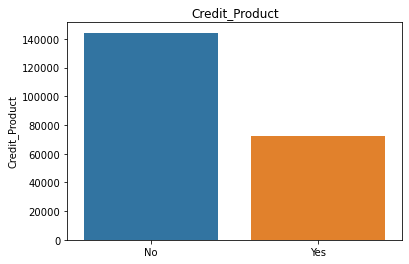

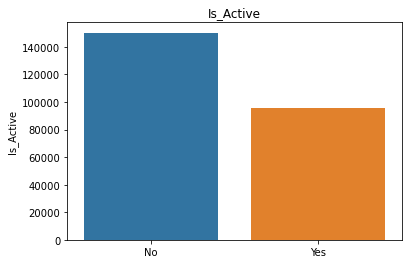

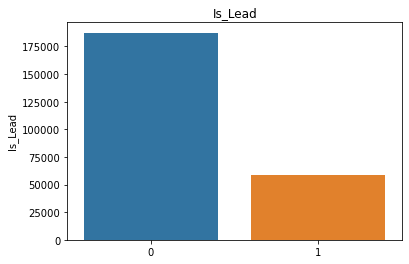

In [16]:
for i in cat:
    sns.barplot(y=train[i].value_counts(),x=train[i].value_counts().index).set_title(i)
    plt.show()

In [17]:
for i in cat:
    if i == 'Is_Lead':
        continue
    print(pd.pivot_table(train, index='Is_Lead', columns = i, values = 'ID', aggfunc='count'))
    print()

Region_Code  RG250  RG251  RG252  RG253  RG254  RG255  RG256  RG257  RG258  \
Is_Lead                                                                      
0             2103   4569   3694   1377  21127   1549   2446   4931   1521   
1              393   1381    592    481   5713    469    401   1170    430   

Region_Code  RG259  ...  RG275  RG276  RG277  RG278  RG279  RG280  RG281  \
Is_Lead             ...                                                    
0             2085  ...   2702   1996   9851   1422   3079   9766   3979   
1              501  ...    543    768   2975    400    897   3009   1114   

Region_Code  RG282  RG283  RG284  
Is_Lead                           
0             4709  20531  13504  
1             1120   8885   5816  

[2 rows x 35 columns]

Gender   Female   Male
Is_Lead               
0         88823  98614
1         22705  35583

Occupation  Entrepreneur  Other  Salaried  Self_Employed
Is_Lead                                                 
0          

In [18]:
x = pd.DataFrame(pd.pivot_table(train, index='Is_Lead', columns = 'Region_Code', values = 'ID', aggfunc='count'))
x.T

Is_Lead,0,1
Region_Code,,
RG250,2103,393
RG251,4569,1381
RG252,3694,592
RG253,1377,481
RG254,21127,5713
RG255,1549,469
RG256,2446,401
RG257,4931,1170
RG258,1521,430


## Observations made so far

1) There's some collinearity between Age and Vintage, which is understandable considering that the customer who's been a customer for a long time is bound to be older than younger. But there are new customers but old people. How do I deal with that?

2) Avg_Account_Balance is right-skewed, I want to scale it logarithmically so I can have a better distribution

3) Vintage is right-skewed too, but I want to explore on its relationship with age instead of scaling logarithmically

4) Also Vintage is in direct relationship with the target variable, as in long term customers are more bound to be a lead, that explains the distribution Vintage shares with Is_Lead.

5) Region_Code are distributed unevenly but their Is_Lead values are in similar ratio, nearly 25% of a region are bound to be leads, but some regions show lower and some show slightly higher ratios. This could be because of various reasons, my initial thought would be that the regions of these places are financially more comfortable than other regions. I want to explore this view to justify target encoding for Region_Code

6) There isn't info on Channel_Code but there is a significant lower number of X4 channel.

7) X1 performs significantly worse in Is_Lead ratios.

8) Entrepreneurs are understandably lower in number compared to other Occupation, and they also have higher Is_Lead ratios compared to their Occuption counterparts.

9) Being Male, having a Credit Product or being an active customer makes you more bound to be lead.

10) I want to explore the NA values on Credit_Product. Is there a pattern to it? Nearly 12% is missing, so it might be relatively safe to delete but it's better to check anyway.

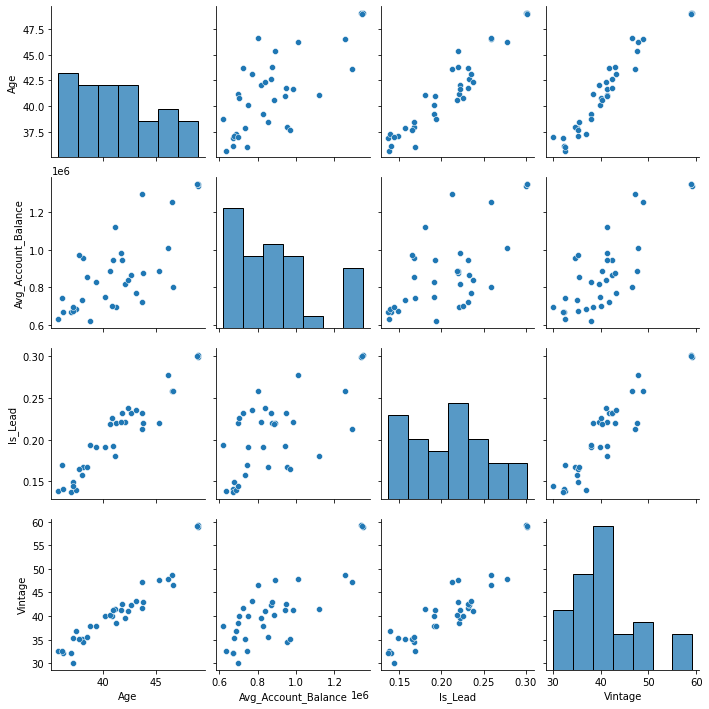

In [19]:
#Exploring Point 5
p5 = pd.pivot_table(train, index='Region_Code', values = num + ['Is_Lead'])
sns.pairplot(p5)

I want to just focus on the Is_Lead row for this. Some regions have lower age average and their Is_Lead probability is low. Similarly, with Avg_Account_Balance and Vintage. So it's safe to assume that the more financial regions are bound to have higher lead possibilities

In [20]:
#Exploring point 10
train_na = train[train.Credit_Product.isna()]
train_na.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
6,ETQCZFEJ,Male,62.0,RG282,Other,X3,20.0,NaN,1056750.0,Yes,1
15,UJ2NJKKL,Male,33.0,RG268,Self_Employed,X2,69.0,NaN,517063.0,Yes,1
31,ABPMK4WU,Female,32.0,RG279,Salaried,X4,15.0,NaN,1072850.0,Yes,1
36,MTEIXMB9,Female,41.0,RG268,Self_Employed,X3,62.0,NaN,962383.0,No,1
40,6WX9JDVK,Female,63.0,RG254,Other,X3,103.0,NaN,1249319.0,Yes,1


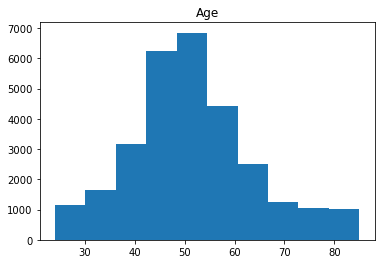

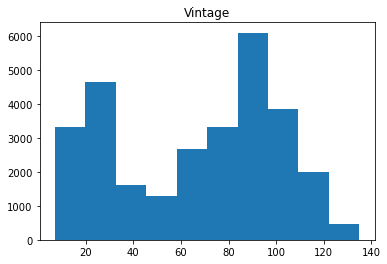

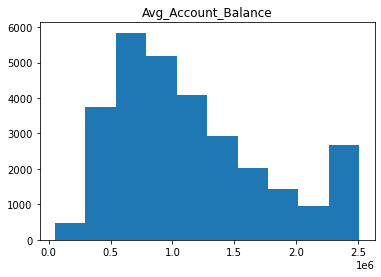

In [21]:
for i in num:
    plt.hist(train_na[i])
    plt.title(i)
    plt.show()

                          Age   Vintage  Avg_Account_Balance
Age                  1.000000  0.441795             0.140759
Vintage              0.441795  1.000000             0.217303
Avg_Account_Balance  0.140759  0.217303             1.000000


<AxesSubplot:>

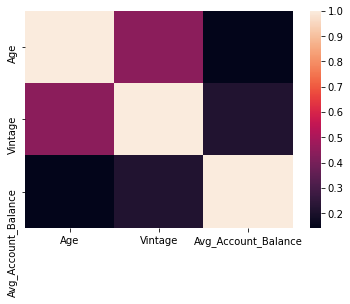

In [22]:
print(train_na[num].corr())
sns.heatmap(train_na[num].corr())

In [23]:
pd.pivot_table(train_na, index='Is_Lead', values = num)

,Age,Avg_Account_Balance,Vintage
Is_Lead,,,
0,52.516782,1.163908e+06,67.570345
1,51.437037,1.150513e+06,66.535215


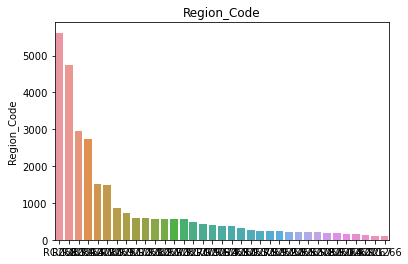

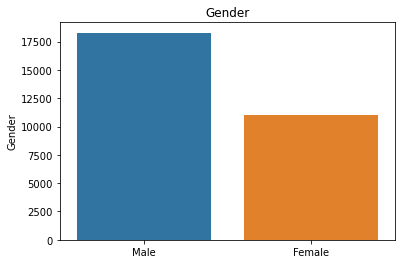

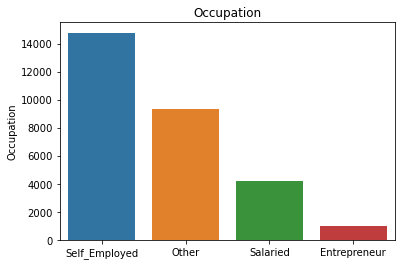

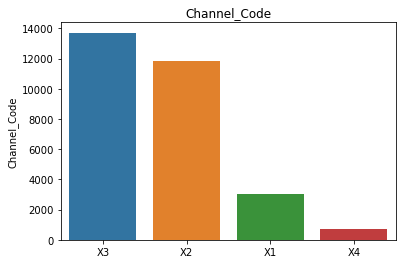

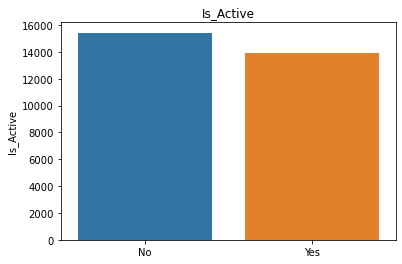

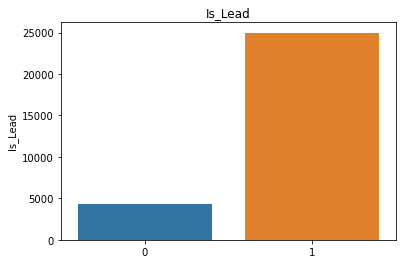

In [24]:
for i in cat:
    if i == 'Credit_Product':
        continue
    sns.barplot(y=train_na[i].value_counts(),x=train_na[i].value_counts().index).set_title(i)
    plt.show()

There is some significance to the NA credit groups, a lot of them are possible leads., they are not influenced by Age or Vintage. I want to call it a new category 'NA'

In [25]:
train.loc[train.Credit_Product.isna(),'Credit_Product'] = 'NA'

In [26]:
train.isna().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

## Steps to do

1) Remove 'ID' column because it has no significance

2) Dummy Encode 'Gender', 'Occupation', 'Channel_Code', 'Credit_Product', 'Is_Active'

3) Bin Ages

4) Target Encode 'Region_Code'

5) Scale 'Avg_Account_Balance'



<AxesSubplot:xlabel='Age', ylabel='Count'>

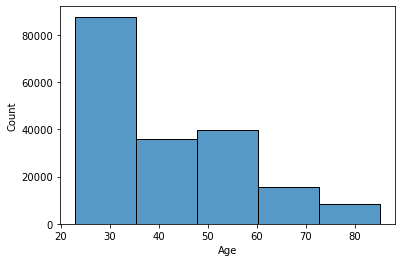

In [27]:
sns.histplot(data=train[train.Is_Lead==0],x='Age',bins=5,binrange=(train.Age.min(),train.Age.max()))

<AxesSubplot:xlabel='Age', ylabel='Count'>

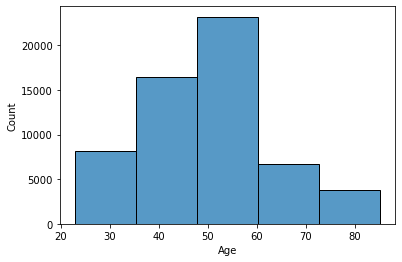

In [28]:
sns.histplot(data=train[train.Is_Lead==1],x='Age',bins=5,binrange=(train.Age.min(),train.Age.max()))

In [29]:
print(list(train.Region_Code.value_counts().index))

['RG268', 'RG283', 'RG254', 'RG284', 'RG277', 'RG280', 'RG269', 'RG270', 'RG261', 'RG257', 'RG251', 'RG282', 'RG274', 'RG272', 'RG281', 'RG273', 'RG252', 'RG279', 'RG263', 'RG275', 'RG260', 'RG256', 'RG264', 'RG276', 'RG259', 'RG250', 'RG255', 'RG258', 'RG253', 'RG278', 'RG262', 'RG266', 'RG265', 'RG271', 'RG267']


In [30]:
#Making another backup of train dataset
train2 = train.copy()

In [31]:
# Dropping ID

In [32]:
train.drop(['ID'], axis=1, inplace=True)

In [33]:
#Encoding

In [34]:
train = pd.get_dummies(train,columns = ['Is_Active','Occupation', 'Channel_Code', 'Credit_Product'], drop_first=True)

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in ['Gender','Region_Code']:
    train[col] = le.fit_transform(train[col])


In [36]:
train

,Gender,Age,Region_Code,Vintage,Avg_Account_Balance,Is_Lead,Is_Active_Yes,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_No,Credit_Product_Yes
0,0,73.0,18,43.0,1045696.0,0,0,1,0,0,0,1,0,1,0
1,0,30.0,27,32.0,581988.0,0,0,0,1,0,0,0,0,1,0
2,0,56.0,18,26.0,1484315.0,0,1,0,0,1,0,1,0,1,0
3,1,34.0,20,19.0,470454.0,0,0,0,1,0,0,0,0,1,0
4,0,30.0,32,33.0,886787.0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245720,1,51.0,34,109.0,1925586.0,0,0,0,0,1,0,1,0,0,0
245721,1,27.0,18,15.0,862952.0,0,1,0,1,0,0,0,0,1,0
245722,0,26.0,31,13.0,670659.0,0,0,0,1,0,0,0,0,1,0
245723,0,28.0,23,31.0,407504.0,0,0,0,1,0,0,0,0,1,0


In [37]:
def log_transform(x):
    return np.log(x+1)

train['Avg_Account_Balance'] = train['Avg_Account_Balance'].apply(log_transform)

In [38]:
X_train = train.drop(['Is_Lead'],axis=1)
y_train = train['Is_Lead']

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc = sc.fit(X_train)
Scaled_X = pd.DataFrame(sc.transform(X_train),columns = X_train.columns)

In [40]:
Scaled_X

,Gender,Age,Region_Code,Vintage,Avg_Account_Balance,Is_Active_Yes,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_No,Credit_Product_Yes
0,-1.096931,1.965365,-0.172389,-0.122373,0.253246,-0.796872,1.581677,-0.643770,-0.834589,-0.616835,1.605042,-0.15228,0.837976,-0.644048
1,-1.096931,-0.934429,0.655830,-0.462372,-0.761478,-0.796872,-0.632240,1.553349,-0.834589,-0.616835,-0.623037,-0.15228,0.837976,-0.644048
2,-1.096931,0.818935,-0.172389,-0.647825,0.859791,1.254906,-0.632240,-0.643770,1.198194,-0.616835,1.605042,-0.15228,0.837976,-0.644048
3,0.911634,-0.664680,0.011660,-0.864188,-1.129888,-0.796872,-0.632240,1.553349,-0.834589,-0.616835,-0.623037,-0.15228,0.837976,-0.644048
4,-1.096931,-0.934429,1.115951,-0.431463,-0.032187,-0.796872,-0.632240,1.553349,-0.834589,-0.616835,-0.623037,-0.15228,0.837976,-0.644048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245720,0.911634,0.481750,1.300000,1.917619,1.310499,-0.796872,-0.632240,-0.643770,1.198194,-0.616835,1.605042,-0.15228,-1.193352,-0.644048
245721,0.911634,-1.136740,-0.172389,-0.987824,-0.079367,1.254906,-0.632240,1.553349,-0.834589,-0.616835,-0.623037,-0.15228,0.837976,-0.644048
245722,-1.096931,-1.204177,1.023927,-1.049642,-0.515912,-0.796872,-0.632240,1.553349,-0.834589,-0.616835,-0.623037,-0.15228,0.837976,-0.644048
245723,-1.096931,-1.069303,0.287733,-0.493281,-1.378635,-0.796872,-0.632240,1.553349,-0.834589,-0.616835,-0.623037,-0.15228,0.837976,-0.644048


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score

In [42]:
models =[]
models.append(('LR', LogisticRegression()))
#models.append(('KNN', KNeighborsClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('DTC', DecisionTreeClassifier()))

In [43]:
for name, model in models:
    max_acc = 0
    max_roc = 0
    train_x, test_x, train_y, test_y = train_test_split(Scaled_X, y_train, random_state = 42, test_size=0.2, stratify = y_train)
    model.fit(train_x, train_y)
    y_pred = model.predict_proba(test_x)[:,1]
    roc = roc_auc_score(test_y, y_pred)
    acc = accuracy_score(test_y, model.predict(test_x))
    if roc>max_roc:
        max_roc = roc
        selectmodel = model
        mean_acc = cross_val_score(selectmodel, Scaled_X, y_train, cv=5, scoring='accuracy').mean()
        std = cross_val_score(selectmodel, Scaled_X, y_train, cv=5, scoring='accuracy').std()
        cvs = cross_val_score(selectmodel, Scaled_X, y_train, cv=5, scoring='accuracy')
    print(name, max_roc, mean_acc, std, cvs, roc)

LR 0.8579089667422557 0.853437786143046 0.0003530002798608172 [0.85290467 0.85329128 0.8536372  0.85339302 0.85396276] 0.8579089667422557
RF 0.8550898491153267 0.8517855326075898 0.0015419718892664153 [0.85141927 0.85125649 0.85044257 0.84952691 0.85477668] 0.8550898491153267
GNB 0.7897930149038275 0.7655590599247126 0.0006940530325728242 [0.76612066 0.76548988 0.76428935 0.76565266 0.76624275] 0.7897930149038275
DTC 0.7085013729446452 0.7849913521212738 0.001367370124311099 [0.78589887 0.78386408 0.78671279 0.78266355 0.78445417] 0.7085013729446452


In [47]:
C = [100,10,1,0.1,0.01]
#penalty = ['l1','l2']
solver = ['liblinear','lbfgs','newton-cg']
param_grid = dict(solver=solver, C=C)
lr = LogisticRegression()
cv = GridSearchCV(lr, param_grid= param_grid, cv=5, scoring='roc_auc')
cv.fit(Scaled_X,y_train)
print(cv.best_estimator_)
print(cv.best_score_)

C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


LogisticRegression(C=0.01, solver='liblinear')
0.8582538249354876


In [48]:
param_grid_rf = {
    'n_estimators':[100,125,150],
    'max_depth':[7,9,11,13]
}
rf = RandomForestClassifier()

cv2 = GridSearchCV(rf, param_grid=param_grid_rf, cv=5, scoring='roc_auc')
cv2.fit(Scaled_X,y_train)
print(cv2.best_estimator_)
print(cv2.best_score_)

RandomForestClassifier(max_depth=11, n_estimators=150)
0.8729405188125297


In [49]:
lr2 = LogisticRegression(C=0.01, solver='liblinear')
train_x, test_x, train_y, test_y = train_test_split(Scaled_X, y_train, random_state=1,test_size=0.2,stratify=y_train)
lr2.fit(train_x,train_y)
y_pred = lr2.predict(test_x)
roc = roc_auc_score(test_y, y_pred)
acc = accuracy_score(test_y, y_pred)
print(auc, acc)

<function auc at 0x000001901A207C10> 0.8545528537999797


In [50]:
rf2 = RandomForestClassifier(max_depth=11, n_estimators= 150)
train_x, test_x, train_y, test_y = train_test_split(Scaled_X, y_train, random_state=1,test_size=0.2,stratify=y_train)
rf2.fit(train_x,train_y)
y_pred = rf2.predict(test_x)
roc = roc_auc_score(test_y, y_pred)
acc = accuracy_score(test_y, y_pred)
print(auc, acc)

<function auc at 0x000001901A207C10> 0.8614508088310103


In [51]:
rf2.fit(Scaled_X, y_train)

RandomForestClassifier(max_depth=11, n_estimators=150)

In [70]:
trainf = pd.read_csv('train.csv')
testf = pd.read_csv('test.csv')

In [71]:
combined = pd.concat([trainf,testf],ignore_index=True)

In [72]:
combined['Credit_Product']=combined['Credit_Product'].fillna('NA')

In [73]:
combined["Is_Active"].replace(["Yes","No"],[1,0],inplace=True)
combined.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,0,0.0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,0,0.0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,1,0.0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,0,0.0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,0,0.0


In [74]:
combined['Avg_Account_Balance'] = combined['Avg_Account_Balance'].apply(log_transform)

In [75]:
lr, ur = outliers(combined['Avg_Account_Balance'])
combined['Avg_Account_Balance'] = np.where(combined['Avg_Account_Balance']>ur,ur,combined['Avg_Account_Balance'])
combined['Avg_Account_Balance'] = np.where(combined['Avg_Account_Balance']<lr,lr,combined['Avg_Account_Balance'])

In [78]:
le = LabelEncoder()
for col in ['Gender','Region_Code']:
    combined[col]= le.fit_transform(combined[col])
combined.head(1)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,0,73,18,Other,X3,43,No,13.860194,0,0.0


In [79]:
combined =pd.get_dummies(combined,columns =['Credit_Product','Occupation','Channel_Code'],drop_first = True)
combined.head()

,ID,Gender,Age,Region_Code,Vintage,Avg_Account_Balance,Is_Active,Is_Lead,Credit_Product_No,Credit_Product_Yes,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4
0,NNVBBKZB,0,73,18,43,13.860194,0,0.0,1,0,1,0,0,0,1,0
1,IDD62UNG,0,30,27,32,13.274207,0,0.0,1,0,0,1,0,0,0,0
2,HD3DSEMC,0,56,18,26,14.210465,1,0.0,1,0,0,0,1,0,1,0
3,BF3NC7KV,1,34,20,19,13.061456,0,0.0,1,0,0,1,0,0,0,0
4,TEASRWXV,0,30,32,33,13.695361,0,0.0,1,0,0,1,0,0,0,0


In [101]:
Trainf = combined.dropna()
Testf = combined[combined.Is_Lead.isna()]

In [102]:
Trainf

,ID,Gender,Age,Region_Code,Vintage,Avg_Account_Balance,Is_Active,Is_Lead,Credit_Product_No,Credit_Product_Yes,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4
0,NNVBBKZB,0,73,18,43,13.860194,0,0.0,1,0,1,0,0,0,1,0
1,IDD62UNG,0,30,27,32,13.274207,0,0.0,1,0,0,1,0,0,0,0
2,HD3DSEMC,0,56,18,26,14.210465,1,0.0,1,0,0,0,1,0,1,0
3,BF3NC7KV,1,34,20,19,13.061456,0,0.0,1,0,0,1,0,0,0,0
4,TEASRWXV,0,30,32,33,13.695361,0,0.0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245720,BPAWWXZN,1,51,34,109,14.470741,0,0.0,0,0,0,0,1,0,1,0
245721,HFNB7JY8,1,27,18,15,13.668116,1,0.0,1,0,0,1,0,0,0,0
245722,GEHAUCWT,0,26,31,13,13.416018,0,0.0,1,0,0,1,0,0,0,0
245723,GE7V8SAH,0,28,23,31,12.917808,0,0.0,1,0,0,1,0,0,0,0


In [103]:
Trainf.drop(['ID'],axis=1,inplace=True)
Xf = Trainf.drop(['Is_Lead'],axis=1)
yf = Trainf[['Is_Lead']]

C:\Anaconda\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [105]:
sc = StandardScaler()
sc=sc.fit(Xf)
Scaled_Xf= pd.DataFrame(sc.transform(Xf),columns=Xf.columns) 

In [107]:
Testf.drop(['ID','Is_Lead'],axis=1,inplace=True)
Testf.head()

C:\Anaconda\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Gender,Age,Region_Code,Vintage,Avg_Account_Balance,Is_Active,Credit_Product_No,Credit_Product_Yes,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4
245725,1,29,4,25,13.517599,0,0,1,1,0,0,0,0,0
245726,1,43,18,49,13.738130,0,0,0,1,0,0,1,0,0
245727,1,31,20,14,12.282802,0,1,0,0,1,0,0,0,0
245728,1,29,22,33,13.674029,0,1,0,1,0,0,0,0,0
245729,0,29,20,19,13.395573,0,1,0,1,0,0,0,0,0


In [108]:
Scaled_testf = pd.DataFrame(sc.transform(Testf),columns=Testf.columns) 

In [109]:
Scaled_testf.head()

,Gender,Age,Region_Code,Vintage,Avg_Account_Balance,Is_Active,Credit_Product_No,Credit_Product_Yes,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4
0,0.911634,-1.001866,-1.460729,-0.678734,-0.351031,-0.796872,-1.193352,1.552678,1.581677,-0.643770,-0.834589,-0.616835,-0.623037,-0.15228
1,0.911634,-0.057747,-0.172389,0.063081,0.010093,-0.796872,-1.193352,-0.644048,1.581677,-0.643770,-0.834589,1.621179,-0.623037,-0.15228
2,0.911634,-0.866992,0.011660,-1.018733,-2.373027,-0.796872,0.837976,-0.644048,-0.632240,1.553349,-0.834589,-0.616835,-0.623037,-0.15228
3,0.911634,-1.001866,0.195708,-0.431463,-0.094875,-0.796872,0.837976,-0.644048,1.581677,-0.643770,-0.834589,-0.616835,-0.623037,-0.15228
4,-1.096931,-1.001866,0.011660,-0.864188,-0.550849,-0.796872,0.837976,-0.644048,1.581677,-0.643770,-0.834589,-0.616835,-0.623037,-0.15228


In [110]:
rf2.fit(Scaled_Xf,yf)

<ipython-input-110-ae0681a297fd>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf2.fit(Scaled_Xf,yf)


RandomForestClassifier(max_depth=11, n_estimators=150)

In [111]:
y_pred = rf2.predict_proba(Scaled_testf)[:,1]

In [65]:
sample = pd.read_csv('sample.csv')
sample.head()

,ID,Is_Lead
0,VBENBARO,0
1,CCMEWNKY,0
2,VK3KGA9M,0
3,TT8RPZVC,0
4,SHQZEYTZ,0


In [66]:
sample['Is_Lead'] = Is_Lead

In [67]:
sample.to_csv('output.csv',index=False)

In [68]:
sample

,ID,Is_Lead
0,VBENBARO,0
1,CCMEWNKY,1
2,VK3KGA9M,1
3,TT8RPZVC,1
4,SHQZEYTZ,1
...,...,...
105307,DBENJOYI,0
105308,CWQ72DWS,0
105309,HDESC8GU,1
105310,2PW4SFCA,1
